# Data Extraction


Extract 100k from 30 million data (Bitcoin metadata)
-  load data with all data of target variable, 'out_and_tx_malicious' = '1'

In [ ]:
# import pandas as pd

# # File paths
# file_path = 'C:/Users/Enduser/OneDrive - Asia Pacific University/uni/Y3S2/fyp/data/DG_out.csv'  
# output_file = "btc_trial_dataset2.csv"

# # set the extraction size
# extract_size = 100000  

# try:
#     # Subset of the dataset
#     data = pd.read_csv(file_path)

#     # Check if the target column exists
#     if 'out_and_tx_malicious' not in data.columns:
#         raise ValueError("Column 'out_and_tx_malicious' not found in dataset!")

#     # Separate fraudulent and normal transactions
#     fraud_df = data[data['out_and_tx_malicious'] == 1]  
#     normal_df = data[data['out_and_tx_malicious'] == 0]  

#     # Define how many normal samples to keep
#     remaining_rows = extract_size - len(fraud_df)  # Fill remaining rows with normal transactions
#     normal_sample = normal_df.sample(n=min(remaining_rows, len(normal_df)), random_state=42)  # Avoid over-sampling

#     # Combine fraud and sampled normal transactions
#     filtered_data = pd.concat([fraud_df, normal_sample])

#     # Shuffle the dataset
#     filtered_data = filtered_data.sample(frac=1, random_state=42).reset_index(drop=True)

#     print(f"Successfully extracted {len(filtered_data)} rows.")
#     print("\nFiltered Dataset Information:")
#     print(filtered_data['out_and_tx_malicious'].value_counts())  
#     # Save extracted data 
#     filtered_data.to_csv(output_file, index=False)
#     print(f"Filtered dataset saved to: {output_file}")

# except FileNotFoundError:
#     print(f"File not found at {file_path}. Please check again.")
# except pd.errors.EmptyDataError:
#     print("The file is empty or invalid.")
# except Exception as e:
#     print(f"An unexpected error occurred: {e}")


# Load file

In [1]:
import numpy as np
import sklearn as sk
import pandas as pd
from time import time
import matplotlib.pyplot as plt
from sklearn import metrics
import gc
import time

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc, roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import classification_report

import seaborn as sns
from pylab import rcParams
import pickle
from sklearn import metrics
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

from pyod.utils.example import visualize
import warnings
import matplotlib.font_manager
warnings.filterwarnings("ignore")

In [2]:
df_path = "C:/Users/Enduser/OneDrive - Asia Pacific University/uni/Y3S2/fyp/Model_trial/btc_trial_dataset2.csv"
dataset_df = pd.read_csv(df_path)

# Data understanding

- Data structural Understanding

In [3]:
dataset_df.shape

(100000, 13)

In [4]:
dataset_df.head()

,tx_hash,indegree,outdegree,in_btc,out_btc,total_btc,mean_in_btc,mean_out_btc,in_malicious,out_malicious,is_malicious,out_and_tx_malicious,all_malicious
0,8aa36825a756c45c6ab7550407281497eca1f730c0998d...,4,2,0.478187,0.476987,0.955174,0.119547,0.238494,0,0,0,0,0
1,c861ebce29f88e7fca25126968a071a953e23ea70990d2...,3,2,2.019000,2.018500,4.037500,0.673000,1.009250,0,0,0,0,0
2,9c962b29520d4c5e5eb089da19fcffe2a253a3ebc6ee31...,1,1,0.180100,0.180100,0.360200,0.180100,0.180100,0,0,0,0,0
3,e6b721806c96a3f1d92b1b72f44bfe0fa9ceaf2f30a4a0...,1,2,5.879800,5.879300,11.759100,5.879800,2.939650,0,0,0,0,0
4,ff88e3d4c4da09906763750261d7c7fe12ebaf0327262d...,4,2,0.495906,0.495406,0.991312,0.123977,0.247703,0,0,0,0,0


- Categorical Data Analysis

In [5]:
# Unique values analysis for specific columns
columns_to_analyze = ['tx_hash', 'in_malicious', 'out_malicious', 'is_malicious', 'out_and_tx_malicious', 'all_malicious']
for col in columns_to_analyze:
    print(f"Unique values in {col}:")
    print(dataset_df[col].value_counts(), "\n")


Unique values in tx_hash:
tx_hash
98298be96afaec69a3610ed5f326f2d5dd8bd062b5396598abbec8be0abb4675    1
af8e27ae20118d91344982b71c2931f4c85cf0a503eb01fce6625df40f42f91e    1
9982fdebcb57373cce1720c76da0e1bd9453219cb38d1e5f5ce472593a8dd125    1
2eb6dc7cbb333a59d61785fb54266ff7c15298677ea40a758e04d85b667f3e41    1
2d99dd333d693b04f9143f56da129e90f59e9a17c651e4a21dcffe29eaf0c26f    1
                                                                   ..
e6b721806c96a3f1d92b1b72f44bfe0fa9ceaf2f30a4a03d1d5a851159a9b18c    1
ff88e3d4c4da09906763750261d7c7fe12ebaf0327262dc3ac4922515a9b9ea2    1
3093eae2c2e49f539c70ee84605aa383a4339294423493cc5dd02690cf34e820    1
62944c74c6817d4423e34f43931f43b1943018b9324ea337f63ea0c5e7122dd2    1
2a2e011a73ba89f7f0aeaa48b40307c1b76450c9461fb16f14b3d6594330996a    1
Name: count, Length: 100000, dtype: int64 

Unique values in in_malicious:
in_malicious
0    99991
1        9
Name: count, dtype: int64 

Unique values in out_malicious:
out_malicious
0    99935
1

- Data Variabe Understanding

In [6]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   tx_hash               100000 non-null  object 
 1   indegree              100000 non-null  int64  
 2   outdegree             100000 non-null  int64  
 3   in_btc                100000 non-null  float64
 4   out_btc               100000 non-null  float64
 5   total_btc             100000 non-null  float64
 6   mean_in_btc           100000 non-null  float64
 7   mean_out_btc          100000 non-null  float64
 8   in_malicious          100000 non-null  int64  
 9   out_malicious         100000 non-null  int64  
 10  is_malicious          100000 non-null  int64  
 11  out_and_tx_malicious  100000 non-null  int64  
 12  all_malicious         100000 non-null  int64  
dtypes: float64(5), int64(7), object(1)
memory usage: 9.9+ MB


Descriptive Statistics

In [7]:
pd.options.display.float_format = '{:.3f}'.format
stat_data = dataset_df.iloc[:,1:8]
stat_data.describe()

,indegree,outdegree,in_btc,out_btc,total_btc,mean_in_btc,mean_out_btc
count,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000
mean,2.180,2.136,54.965,54.682,109.647,49.104,28.411
std,8.313,4.448,1085.780,1084.143,2169.524,1070.443,546.730
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,1.000,2.000,0.100,0.100,0.211,0.064,0.052
50%,1.000,2.000,0.929,0.955,1.960,0.535,0.489
75%,2.000,2.000,8.593,9.095,18.440,5.572,4.548
max,624.000,728.000,245000.000,245000.000,490000.000,245000.000,122500.000


# Data Visualization

- Histogram

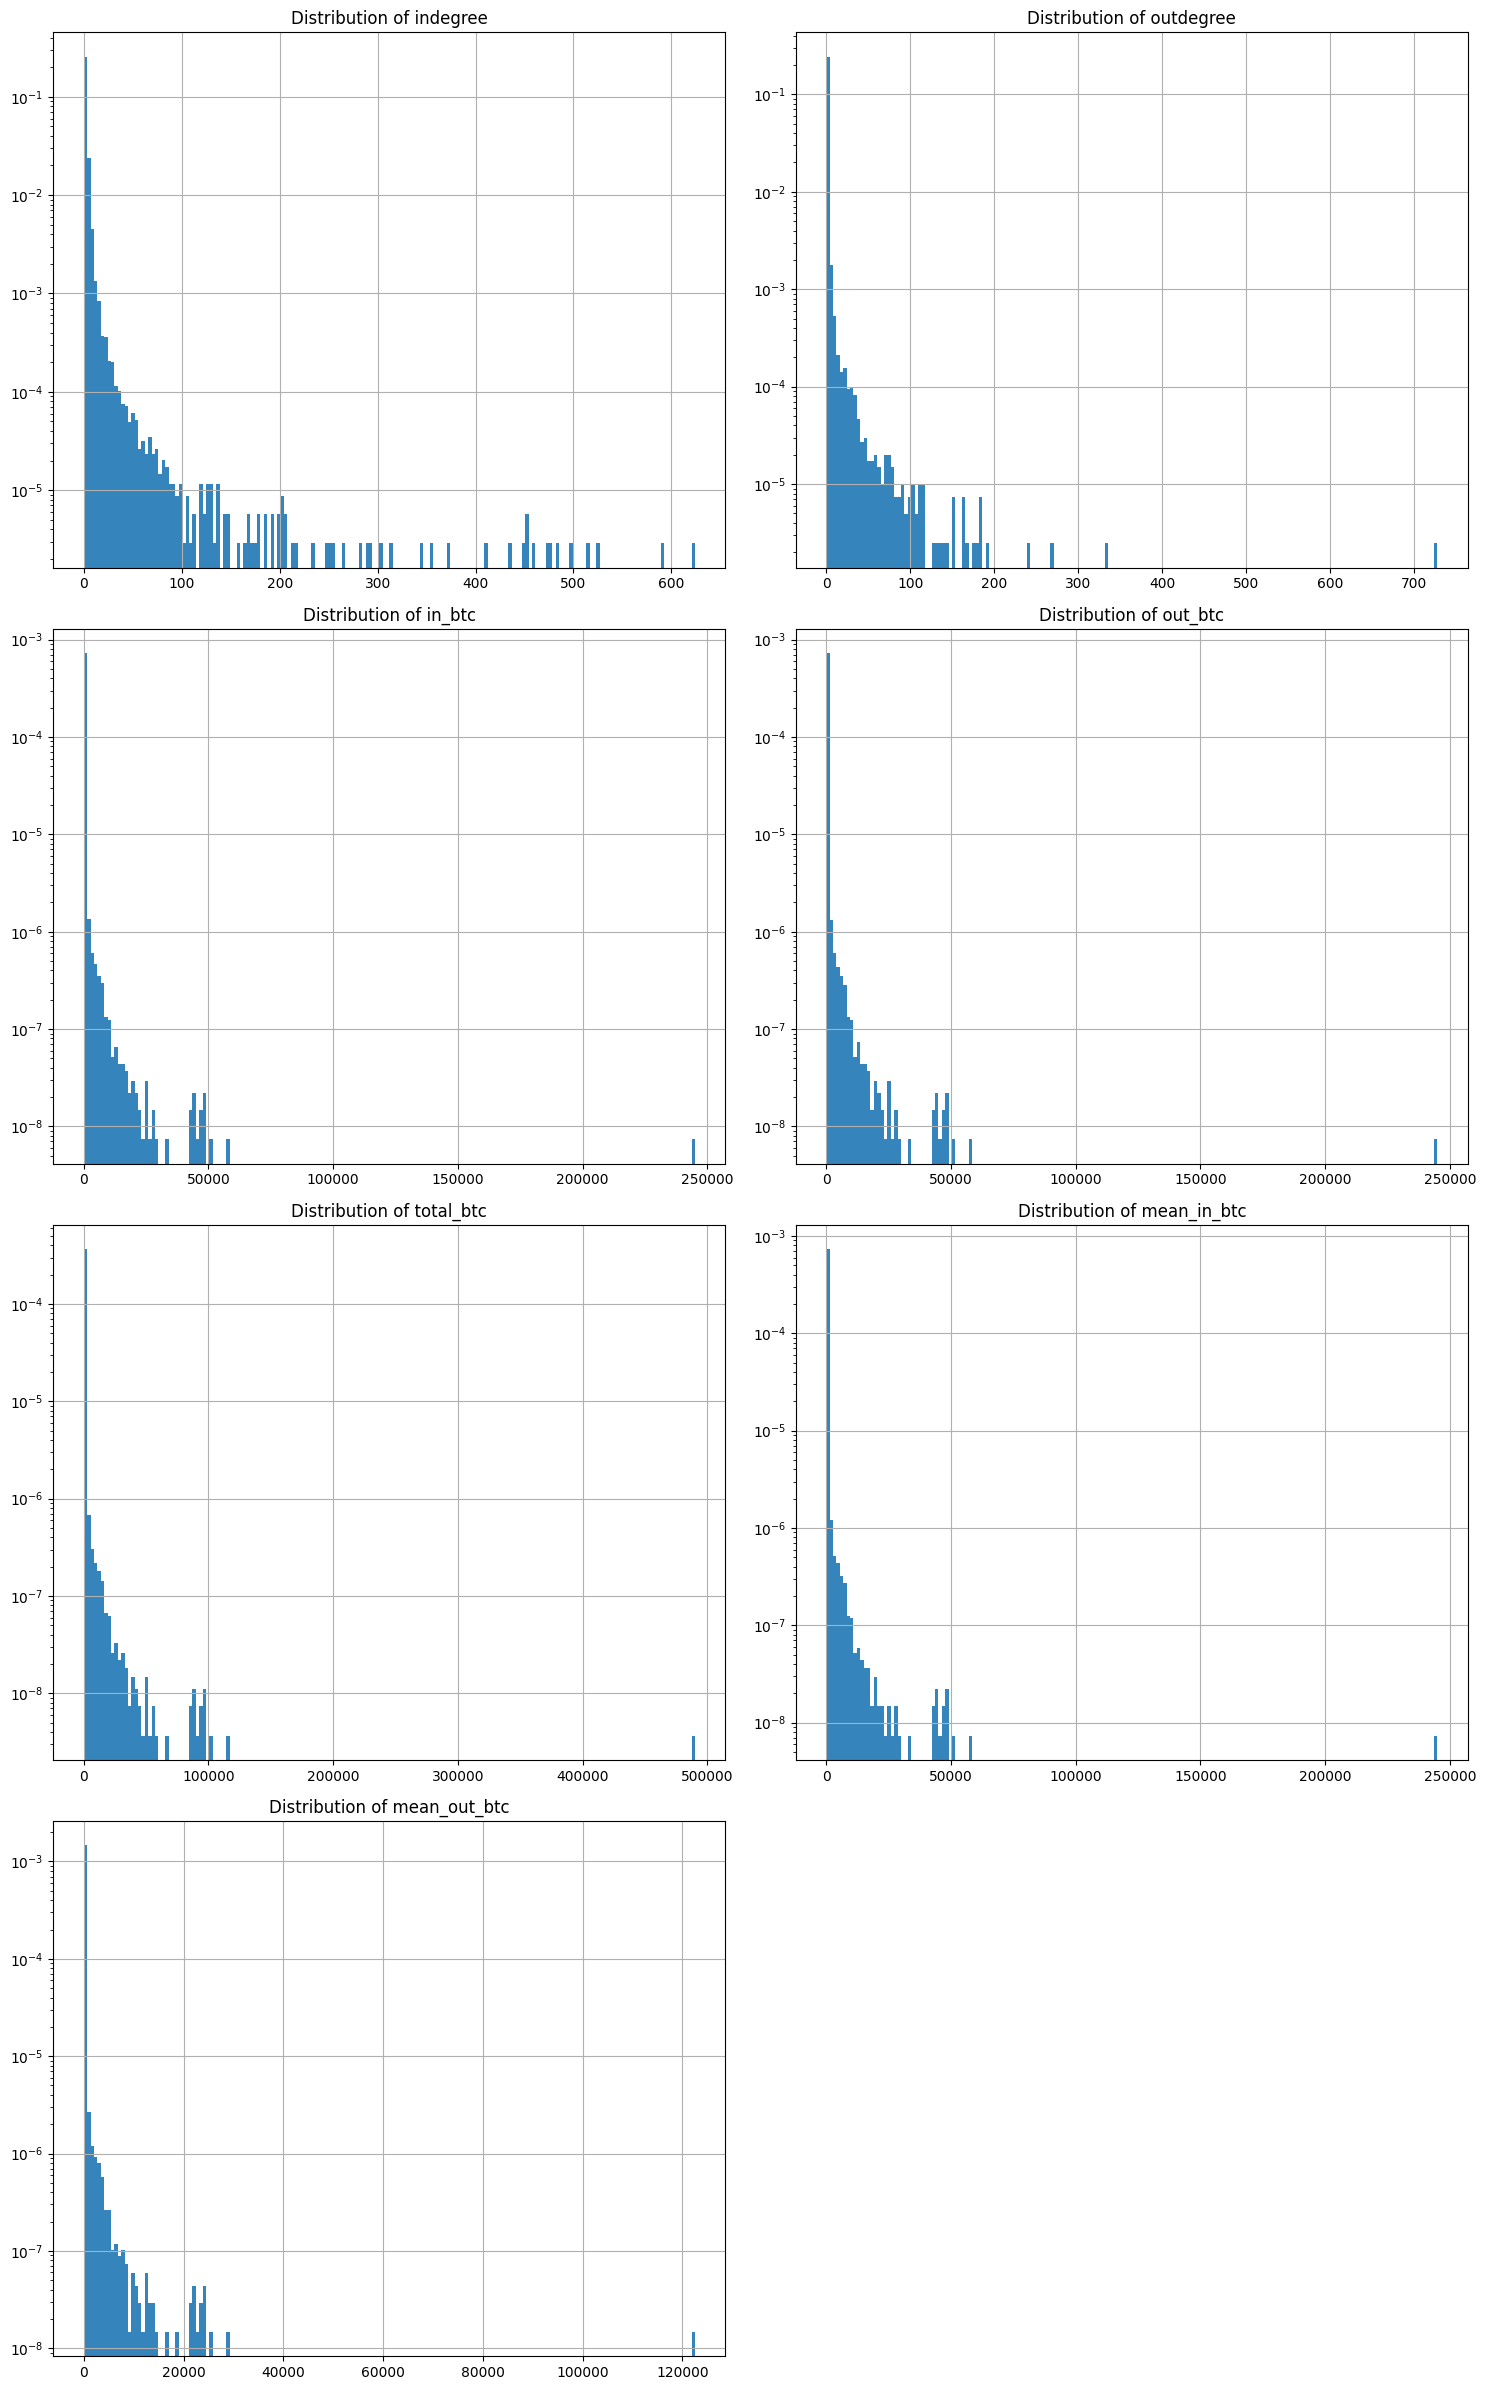

In [3]:
import matplotlib.pyplot as plt

def histogram_plot(dataset_df, numeric_columns):
    # Only numeric columns are visualised
    dataset_df = dataset_df[numeric_columns]
    
    bins = 180  
    rows = (len(numeric_columns) + 1) // 2  
    fig, ax = plt.subplots(rows, 2, figsize=(15, 6 * rows))  
    ax = ax.flatten()  
    
    for c, column in enumerate(numeric_columns):
        ax[c].hist(dataset_df[column].dropna(), bins=bins, alpha=0.9, log=True, density=True)
        ax[c].set_title(f"Distribution of {column}")
        ax[c].grid()
    
    # Remove unused subplot 
    for i in range(c + 1, len(ax)):
        fig.delaxes(ax[i])
    
    plt.tight_layout()
    plt.show()

# Numeric columns to include
numeric_columns = [
    'indegree', 'outdegree', 'in_btc', 'out_btc', 
    'total_btc', 'mean_in_btc', 'mean_out_btc'
]

# Plot the histogram
histogram_plot(dataset_df, numeric_columns)

- Boxplot

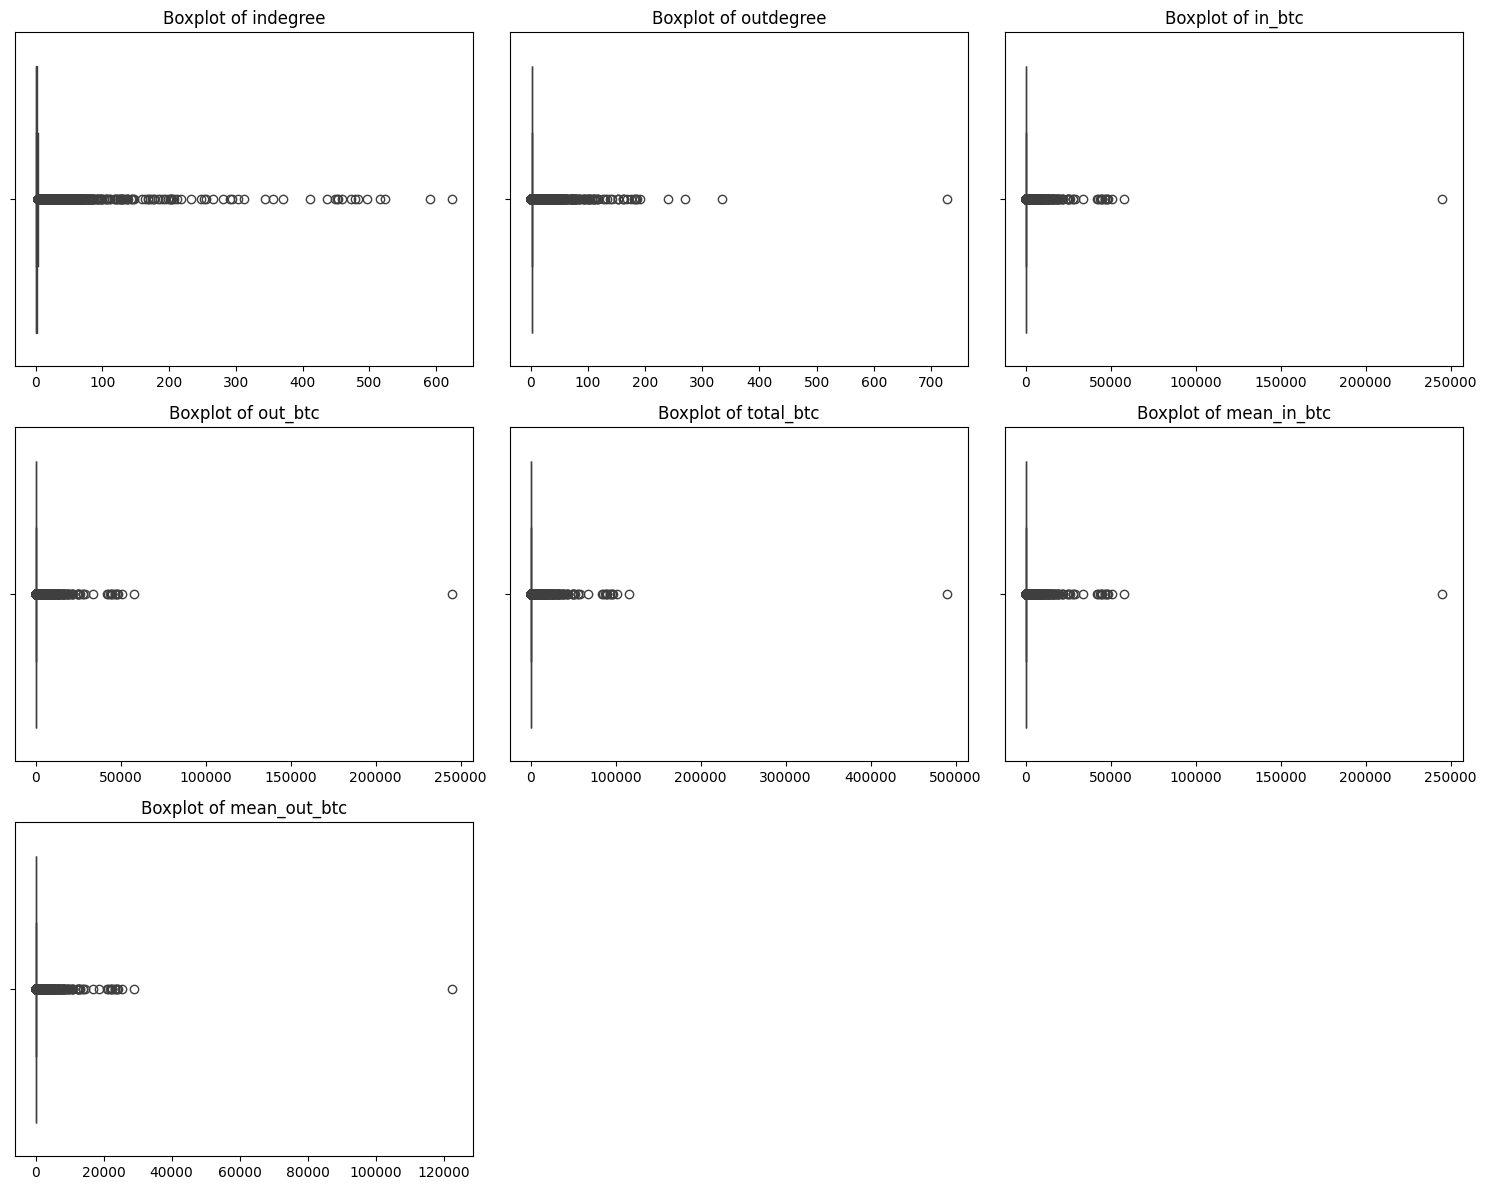

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplots for numeric columns
num_col = ['indegree', 'outdegree', 'in_btc', 'out_btc', 
                   'total_btc', 'mean_in_btc', 'mean_out_btc']

plt.figure(figsize=(15, 12))

for i, column in enumerate(num_col, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=dataset_df, x=column)
    plt.title(f"Boxplot of {column}")
    plt.xlabel('')
plt.tight_layout()
plt.show()

# Data Pre-processing

Analyse data type & Missing value

In [5]:
import pandas as pd

print("\nData Types:\n\n", dataset_df.dtypes)

# Calculate the sum of missing values for each column
missing_values = dataset_df.isnull().sum()
missing_values = missing_values[missing_values > 0]

# Check if there are any missing values and print missing values

if missing_values.empty:
    print("\nNo missing values in the dataset.")
else:
    print("\nMissing Values:\n", missing_values)


Data Types:

 tx_hash                  object
indegree                  int64
outdegree                 int64
in_btc                  float64
out_btc                 float64
total_btc               float64
mean_in_btc             float64
mean_out_btc            float64
in_malicious              int64
out_malicious             int64
is_malicious              int64
out_and_tx_malicious      int64
all_malicious             int64
dtype: object

No missing values in the dataset.


Check for data duplication

In [6]:
# Check for duplicate rows
before_duplicate_check = dataset_df.duplicated().sum()
print(f"\nNumber of Duplicate Rows Before Removal: {before_duplicate_check}")

# Remove duplicate rows
dataset_df.drop_duplicates(inplace=True)

# Check duplicates after removal
after_duplicate_check = dataset_df.duplicated().sum()
print(f"\nNumber of Duplicate Rows After Removal: {after_duplicate_check}")


Number of Duplicate Rows Before Removal: 0

Number of Duplicate Rows After Removal: 0


# Feature Selection

- Heat map

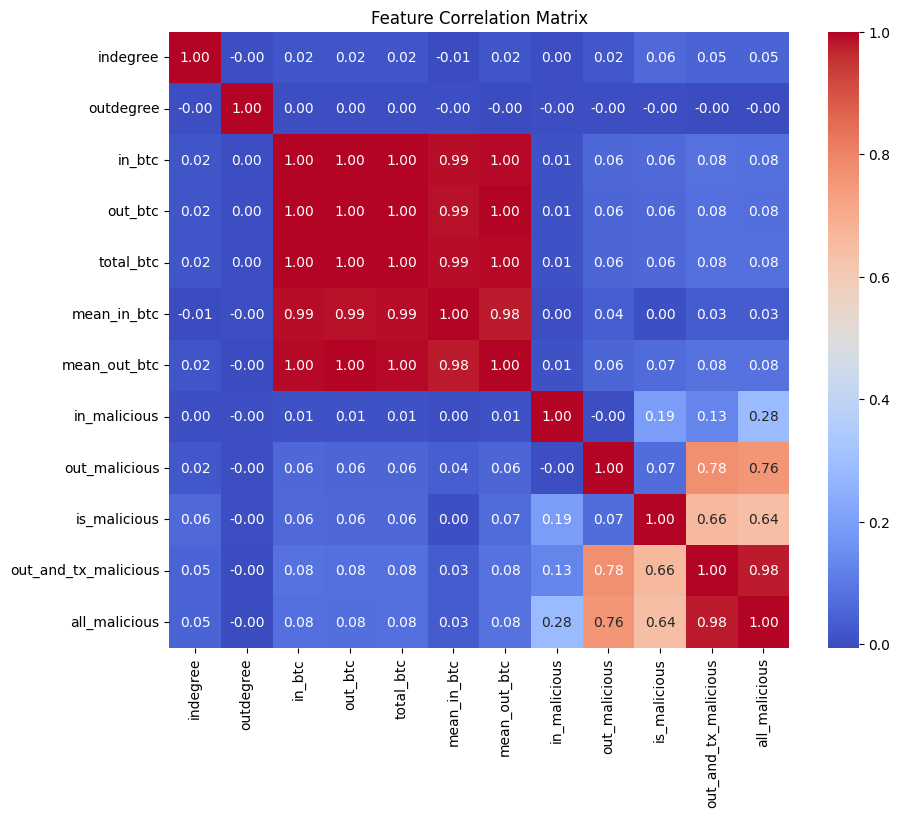

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Exclude non-numeric columns
numeric_data = dataset_df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
correlation_matrix = numeric_data.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()


- drop

In [7]:
drop_cols = ['tx_hash', 'is_malicious', 'all_malicious', 'mean_in_btc', 'mean_out_btc']
dataset_df.drop(columns=drop_cols, inplace=True)

In [8]:
dataset_df.head()

,indegree,outdegree,in_btc,out_btc,total_btc,in_malicious,out_malicious,out_and_tx_malicious
0,4,2,0.478187,0.476987,0.955174,0,0,0
1,3,2,2.019000,2.018500,4.037500,0,0,0
2,1,1,0.180100,0.180100,0.360200,0,0,0
3,1,2,5.879800,5.879300,11.759100,0,0,0
4,4,2,0.495906,0.495406,0.991312,0,0,0


feature selection, not nid ?

In [75]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

random_forest_model = RandomForestClassifier(n_jobs=-1, random_state=42)

# Sequential Feature Selector setting
sfs = SFS(
    random_forest_model,
    k_features=6,          
    forward=True,          
    floating=False,       
    scoring='accuracy',    
    cv=5,                  
    verbose=2              
)

# Define feature matrix (X) and target variable (y)
X = dataset_df[numeric_columns]  # Use numeric columns as features
y = dataset_df['out_and_tx_malicious']  # Use the target variable

# Perform feature selection
sfs = sfs.fit(X, y)

# Extract selected features
selected_features = list(sfs.k_feature_names_)
print("\nSelected Features:", selected_features)

random_forest_model.fit(X[selected_features], y)

# Calculate features' importance
feature_importances = pd.DataFrame({
    'Feature': selected_features,
    'Importance': random_forest_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance Ranking:")
print(feature_importances)


[2025-03-28 00:26:29] Features: 1/6 -- score: 0.99892
[2025-03-28 00:27:38] Features: 2/6 -- score: 0.9989100000000001
[2025-03-28 00:28:29] Features: 3/6 -- score: 0.99849
[2025-03-28 00:29:33] Features: 4/6 -- score: 0.9987199999999999
[2025-03-28 00:30:31] Features: 5/6 -- score: 0.9987300000000001
[2025-03-28 00:31:16] Features: 6/6 -- score: 0.9987100000000002


Selected Features: ['indegree', 'outdegree', 'in_btc', 'out_btc', 'total_btc', 'mean_out_btc']

Feature Importance Ranking:
        Feature  Importance
2        in_btc       0.215
4     total_btc       0.213
3       out_btc       0.199
5  mean_out_btc       0.186
0      indegree       0.158
1     outdegree       0.029


# Data Splitting

In [9]:
from sklearn.model_selection import train_test_split

X = dataset_df.drop('out_and_tx_malicious', axis=1)
y = dataset_df['out_and_tx_malicious']

# Original dataset split into train (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)

# further split the training data into train (85%) and validation (15%)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.10, random_state=42)


# log

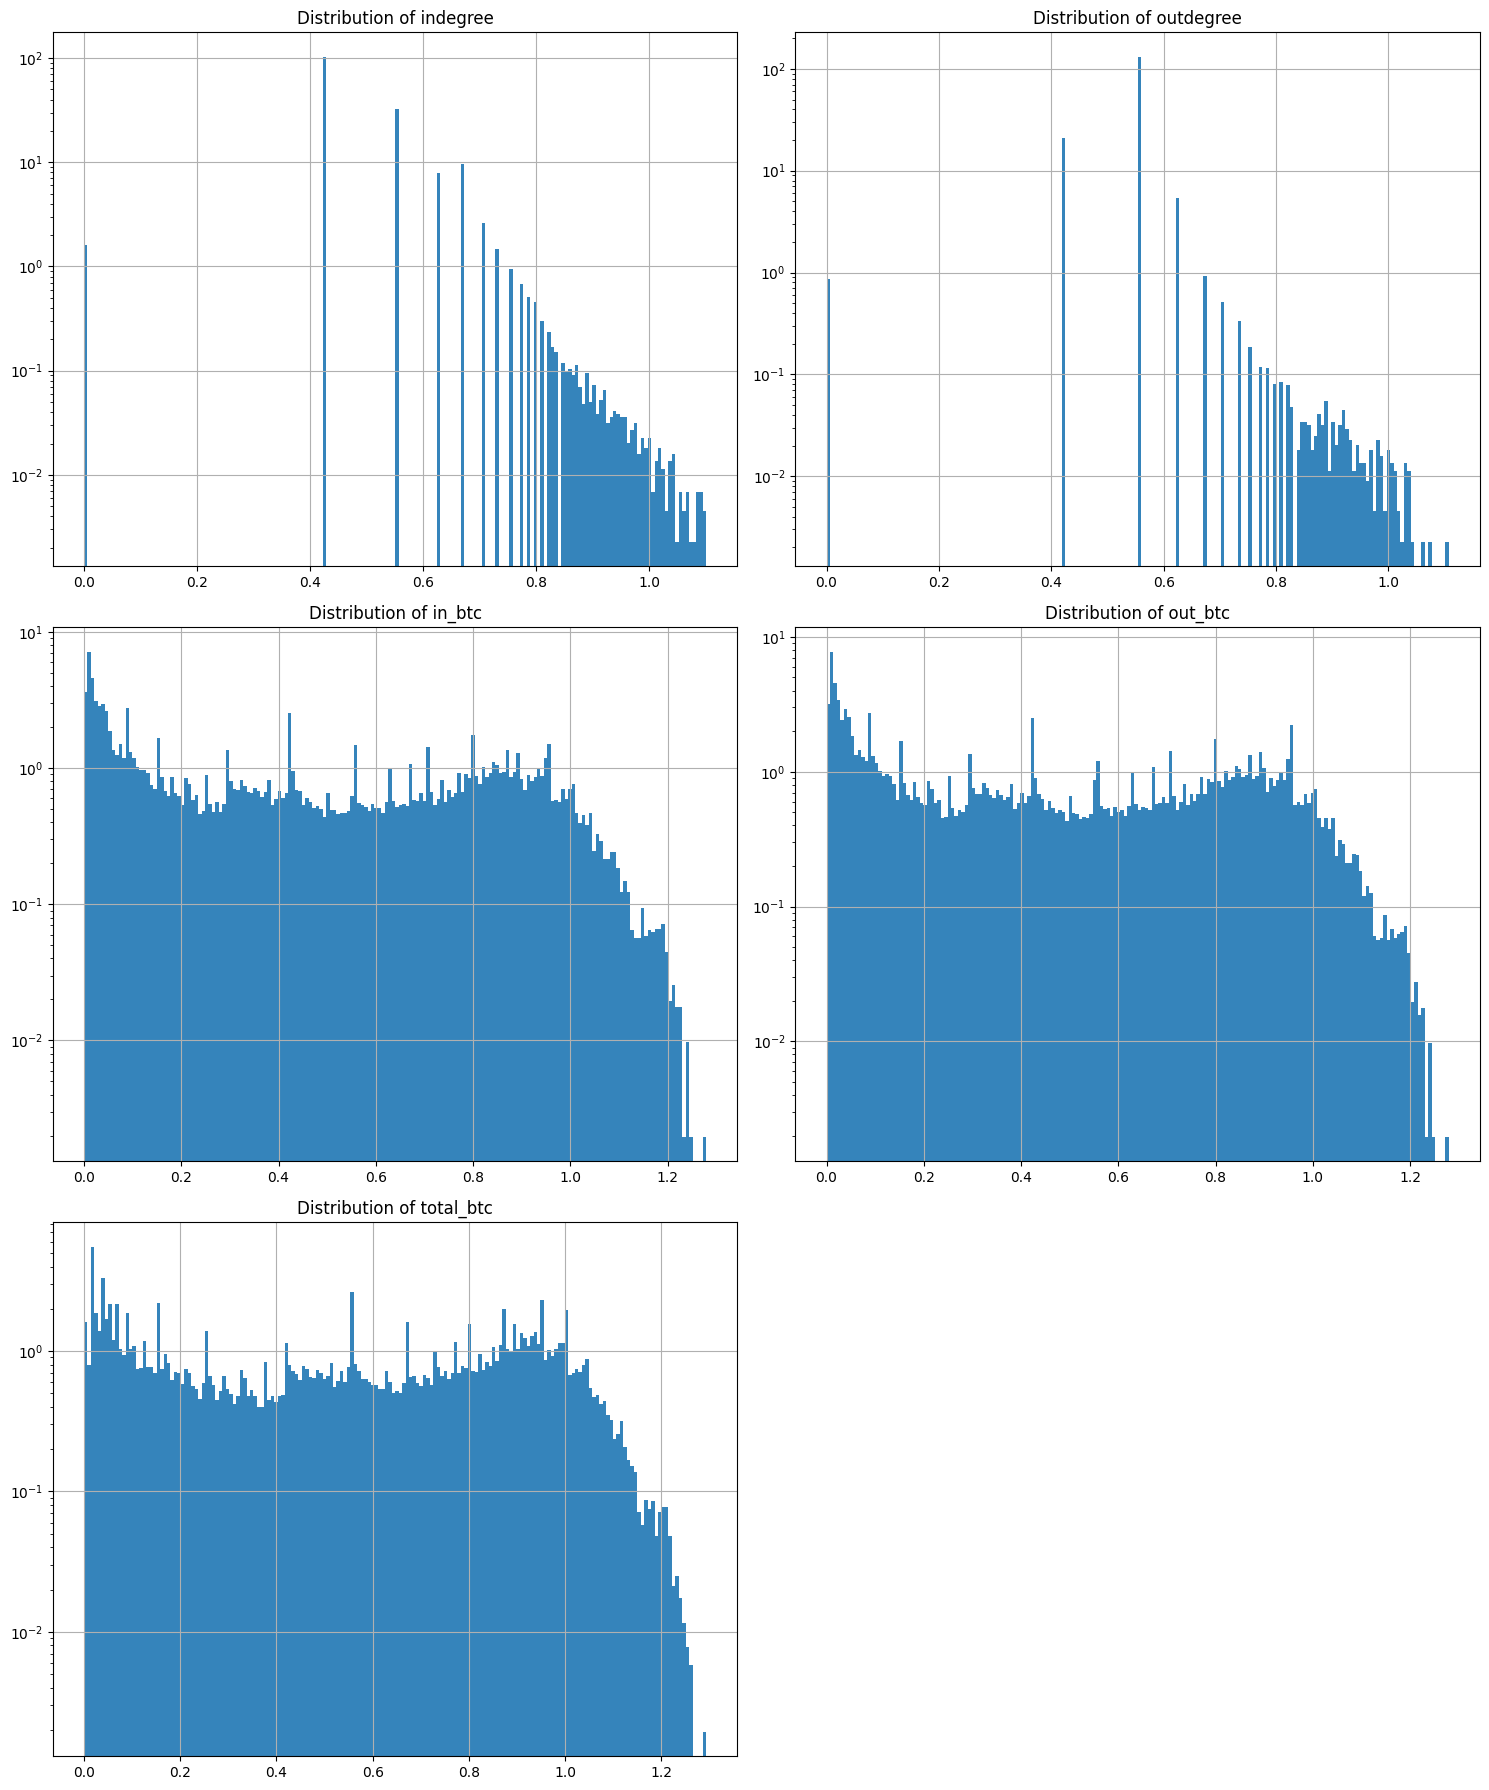

In [15]:
# Apply Log Transformation (Avoid Negative or Zero Values)
log_features = ['indegree', 'outdegree', 'in_btc', 'out_btc','total_btc']

for feature in log_features:
    X_train[feature] = np.log1p(X_train[feature])  # log1p avoids log(0)
    X_val[feature] = np.log1p(X_val[feature])
    X_test[feature] = np.log1p(X_test[feature])
    
histogram_plot(X_train, log_features)

# Data balancing -smote

In [16]:
from imblearn.over_sampling import SMOTE
# Apply SMOTE before scaling

smote = SMOTE(sampling_strategy=0.01, random_state=42)  # Increased sampling
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Class distribution after SMOTE:")
print(pd.Series(y_train_smote).value_counts())


Class distribution after SMOTE:
out_and_tx_malicious
0    71922
1      719
Name: count, dtype: int64


# Robust scale

Training Data Distribution After Robust Scaling:
           indegree     outdegree        in_btc       out_btc     total_btc  \
count  72641.000000  72641.000000  72641.000000  72641.000000  72641.000000   
mean       0.509748     -0.013753      0.048890      0.045263     -0.033808   
std        0.900364      0.070095      0.505606      0.502202      0.504831   
min       -3.214986     -0.554618     -0.589807     -0.591702     -0.779543   
25%        0.000000      0.000000     -0.465145     -0.468860     -0.552857   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        1.000000      0.000000      0.534855      0.531140      0.447143   
max        5.150864      0.552971      1.241306      1.220514      1.041849   

       in_malicious  out_malicious  
count  72641.000000   72641.000000  
mean       0.000330       0.005741  
std        0.018174       0.075549  
min        0.000000       0.000000  
25%        0.000000       0.000000  
50%        0.0000

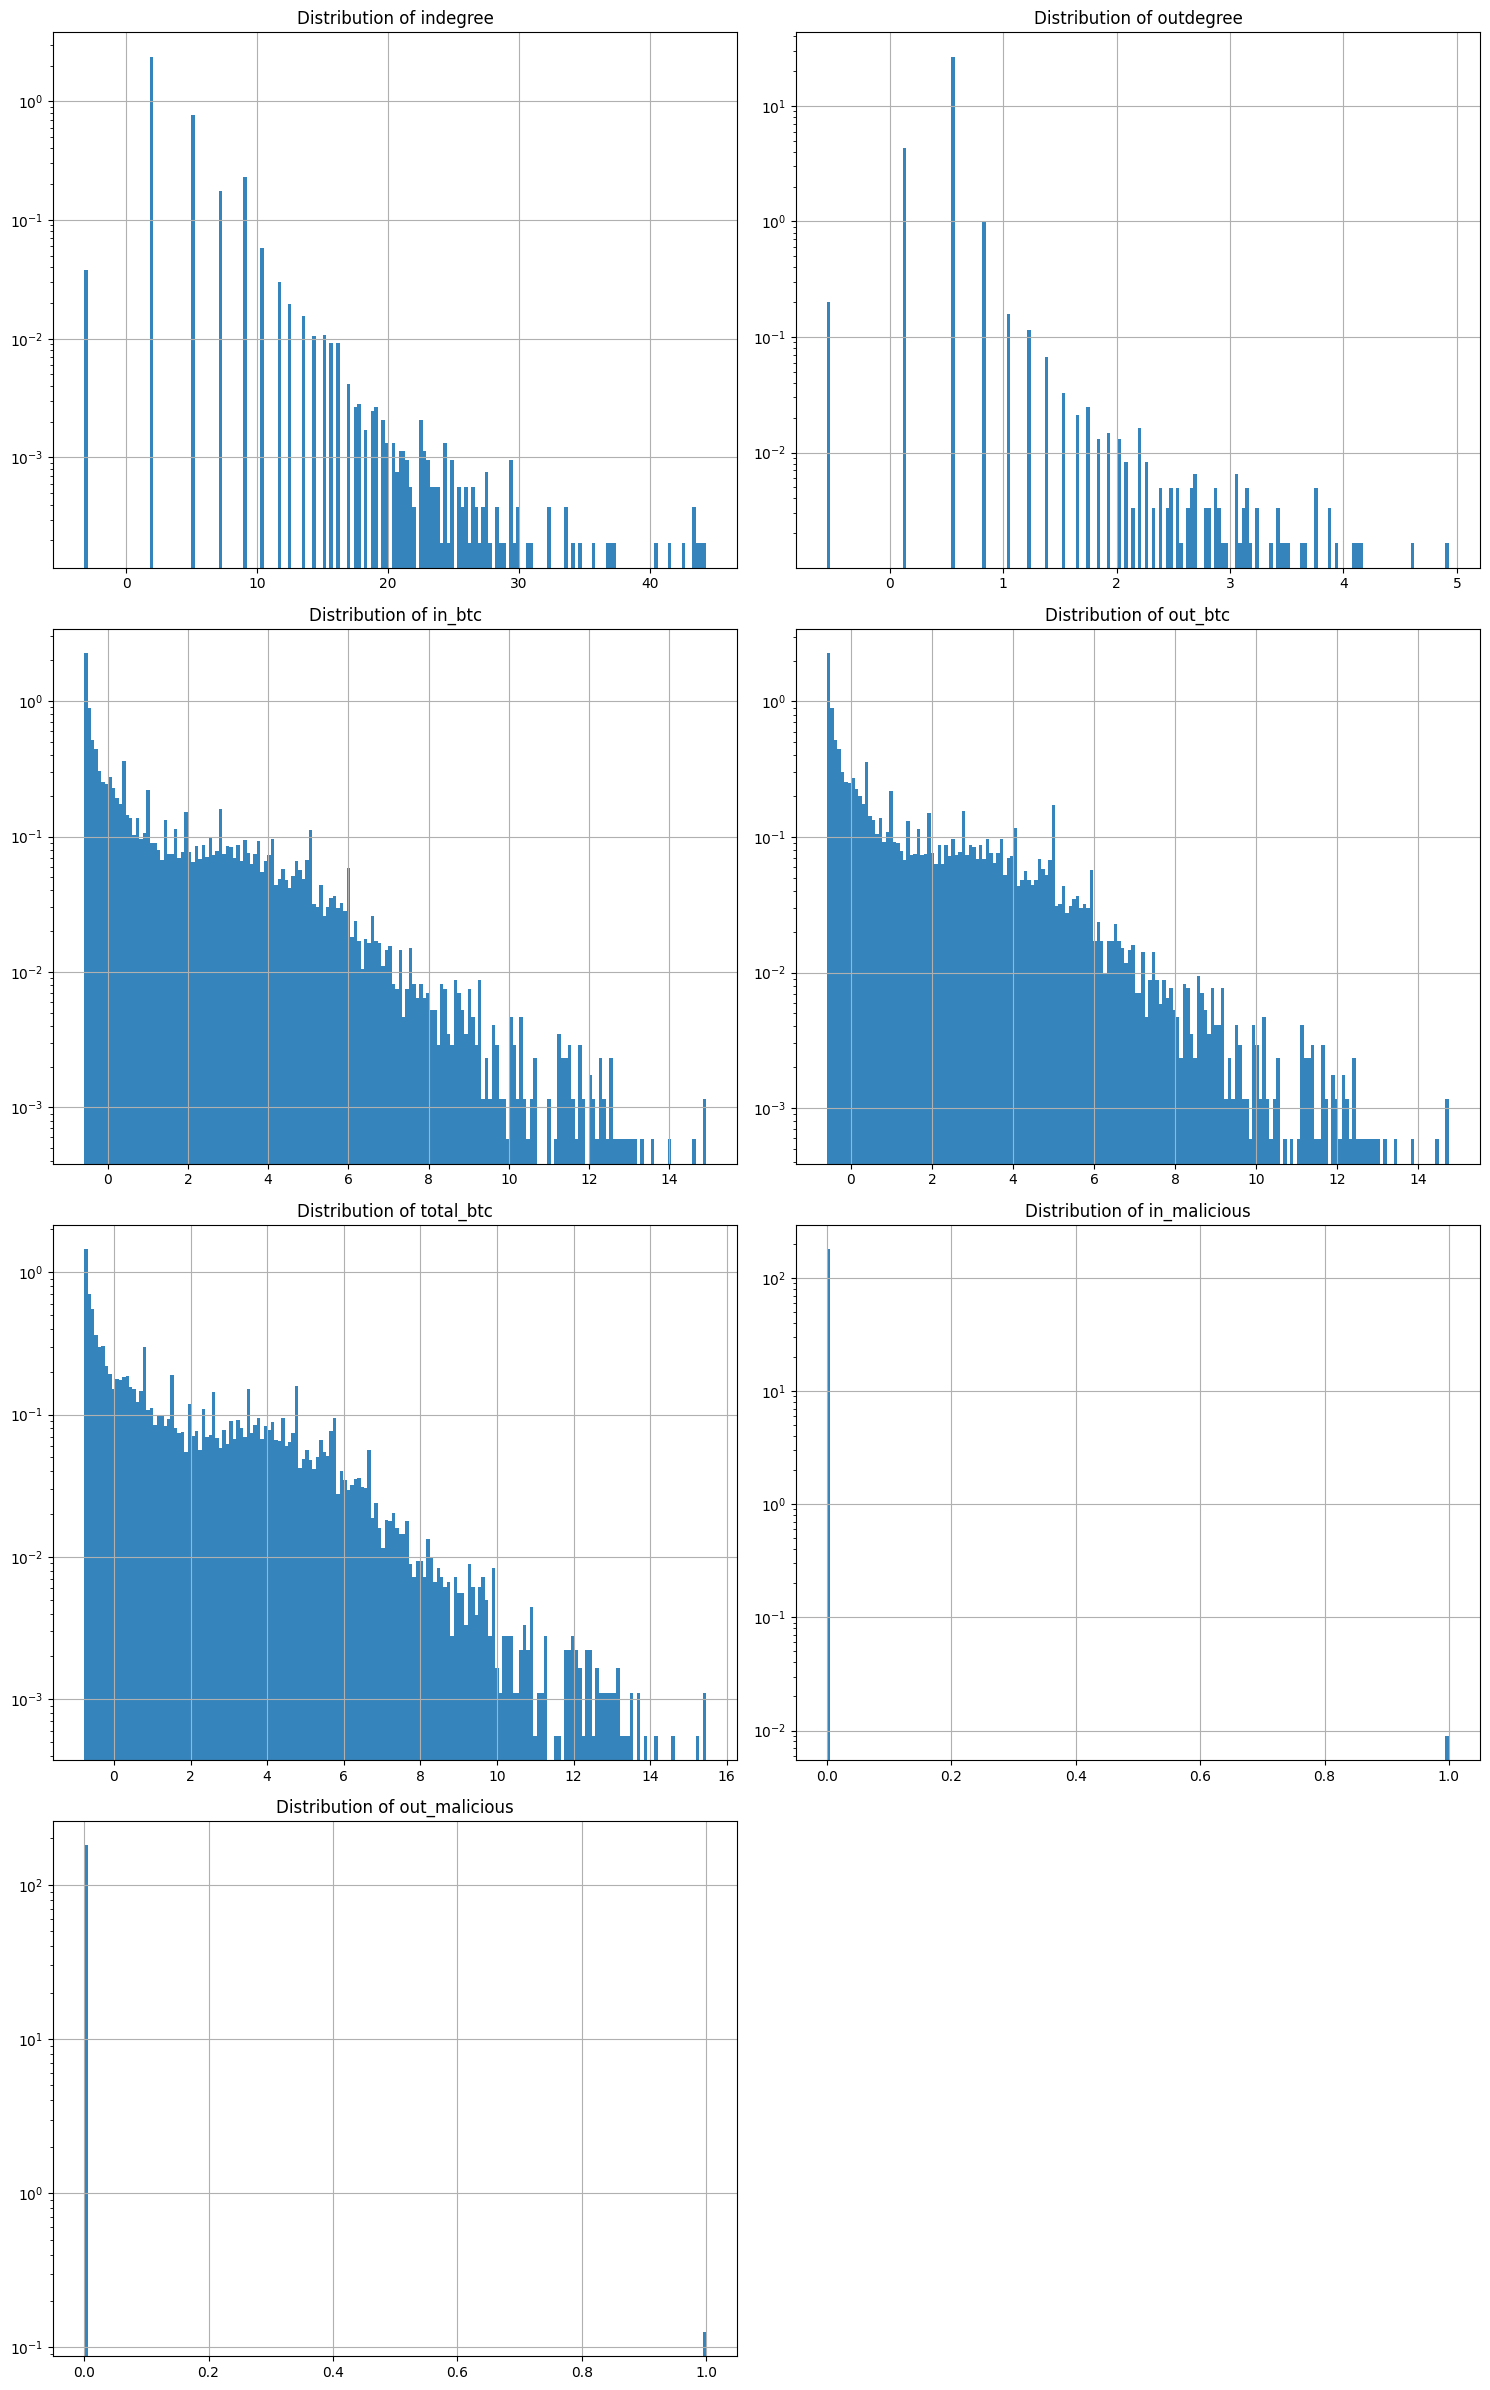

In [17]:
# Standardize features after SMOTE
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

# Print the data distribution after robust scaling
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_val_scaled_df = pd.DataFrame(X_val_scaled, columns=X_val.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print("Training Data Distribution After Robust Scaling:")
print(X_train_scaled_df.describe())

print("\nValidation Data Distribution After Robust Scaling:")
print(X_val_scaled_df.describe())

print("\nTest Data Distribution After Robust Scaling:")
# View the changes with histogram using the histogram_plot function
histogram_plot(X_test_scaled_df, X_test_scaled_df.columns)


[I 2025-03-28 15:21:01,288] A new study created in memory with name: no-name-c692a1e4-bb37-43e8-8caa-b89b78d55aa6
[I 2025-03-28 15:21:02,462] Trial 0 finished with value: 0.005332686947036723 and parameters: {'max_depth': 8, 'learning_rate': 0.0030311799428260227, 'n_estimators': 334, 'subsample': 0.7955365174575852, 'colsample_bytree': 0.845311584236817}. Best is trial 0 with value: 0.005332686947036723.
[I 2025-03-28 15:21:04,349] Trial 1 finished with value: 0.005515858092014542 and parameters: {'max_depth': 10, 'learning_rate': 0.006119998898830113, 'n_estimators': 498, 'subsample': 0.6417732795666712, 'colsample_bytree': 0.7123170729907427}. Best is trial 1 with value: 0.005515858092014542.
[I 2025-03-28 15:21:05,197] Trial 2 finished with value: 0.0021975826590750177 and parameters: {'max_depth': 6, 'learning_rate': 0.0013878602683115144, 'n_estimators': 310, 'subsample': 0.9926172660340885, 'colsample_bytree': 0.8608254126161904}. Best is trial 1 with value: 0.005515858092014542

Best Parameters: {'max_depth': 8, 'learning_rate': 0.016762234044922133, 'n_estimators': 180, 'subsample': 0.6079178922870454, 'colsample_bytree': 0.9885087465217919}
Optimal Threshold from Full Training: 0.875


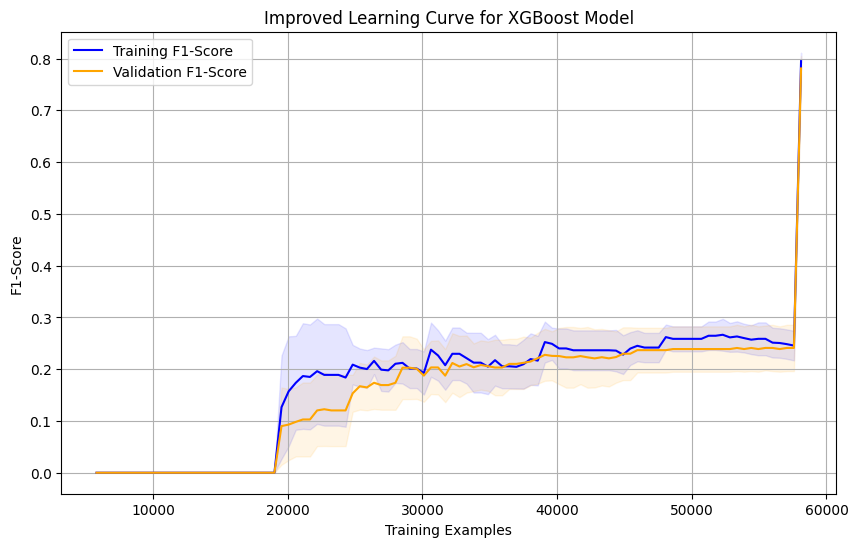


Final Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19978
           1       1.00      0.64      0.78        22

    accuracy                           1.00     20000
   macro avg       1.00      0.82      0.89     20000
weighted avg       1.00      1.00      1.00     20000

Final F1-Score (Fraud Class): 0.778


In [16]:
from sklearn.model_selection import learning_curve, StratifiedKFold
from sklearn.metrics import f1_score, classification_report, precision_recall_curve
from xgboost import XGBClassifier
import optuna  # Bayesian optimization
from sklearn.metrics import confusion_matrix

# Compute scale_pos_weight for imbalance handling
scale_pos_weight = (y_train.value_counts()[0] / y_train.value_counts()[1])

# Hyperparameter tuning with Optuna
def objective(trial):
    params = {
        'max_depth': trial.suggest_int('max_depth', 4, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'scale_pos_weight': scale_pos_weight,
        'eval_metric': 'logloss',
        'random_state': 42
    }
    model = XGBClassifier(**params)
    model.fit(X_train_scaled, y_train_smote)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    return f1_score(y_test, (y_pred_proba > 0.5).astype(int))  # Default threshold

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

best_params = study.best_params
print(f"Best Parameters: {best_params}")

# Train final model with best parameters
xgb_model = XGBClassifier(**best_params)
xgb_model.fit(X_train_scaled, y_train_smote)

# Determine optimal threshold
y_pred_proba_test = xgb_model.predict_proba(X_test_scaled)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba_test)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal Threshold from Full Training: {optimal_threshold:.3f}")

# Custom scorer using the optimal threshold
def custom_scorer(estimator, X, y):
    y_pred_proba = estimator.predict_proba(X)[:, 1]
    y_pred = (y_pred_proba >= optimal_threshold).astype(int)
    return f1_score(y, y_pred)

# Learning Curve with StratifiedKFold
train_sizes = np.linspace(0.1, 1.0, 100)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

train_sizes, train_scores, val_scores = learning_curve(
    xgb_model, X_train_scaled, y_train_smote,
    cv=cv, scoring=custom_scorer, n_jobs=-1,
    train_sizes=train_sizes
)

# Calculate mean and std
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot Learning Curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training F1-Score', color='blue')
plt.plot(train_sizes, val_scores_mean, label='Validation F1-Score', color='orange')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.1, color='orange')
plt.xlabel('Training Examples')
plt.ylabel('F1-Score')
plt.title('Improved Learning Curve for XGBoost Model')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Final Model Evaluation
y_pred_proba = xgb_model.predict_proba(X_test_scaled)[:, 1]
y_pred = (y_pred_proba >= optimal_threshold).astype(int)

print("\nFinal Classification Report:")
print(classification_report(y_test, y_pred))
print(f"Final F1-Score (Fraud Class): {f1_score(y_test, y_pred):.3f}")


-------------------------------------------

# Scaling

In [ ]:
scaler = StandardScaler()

# Scale the resampled training data
X_train_smote_scaled = scaler.fit_transform(X_train_smote)

# Scale the validation and test data using the same scaling parameters
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

Data transformation with log
-data is highly skewed

Before log transformation:


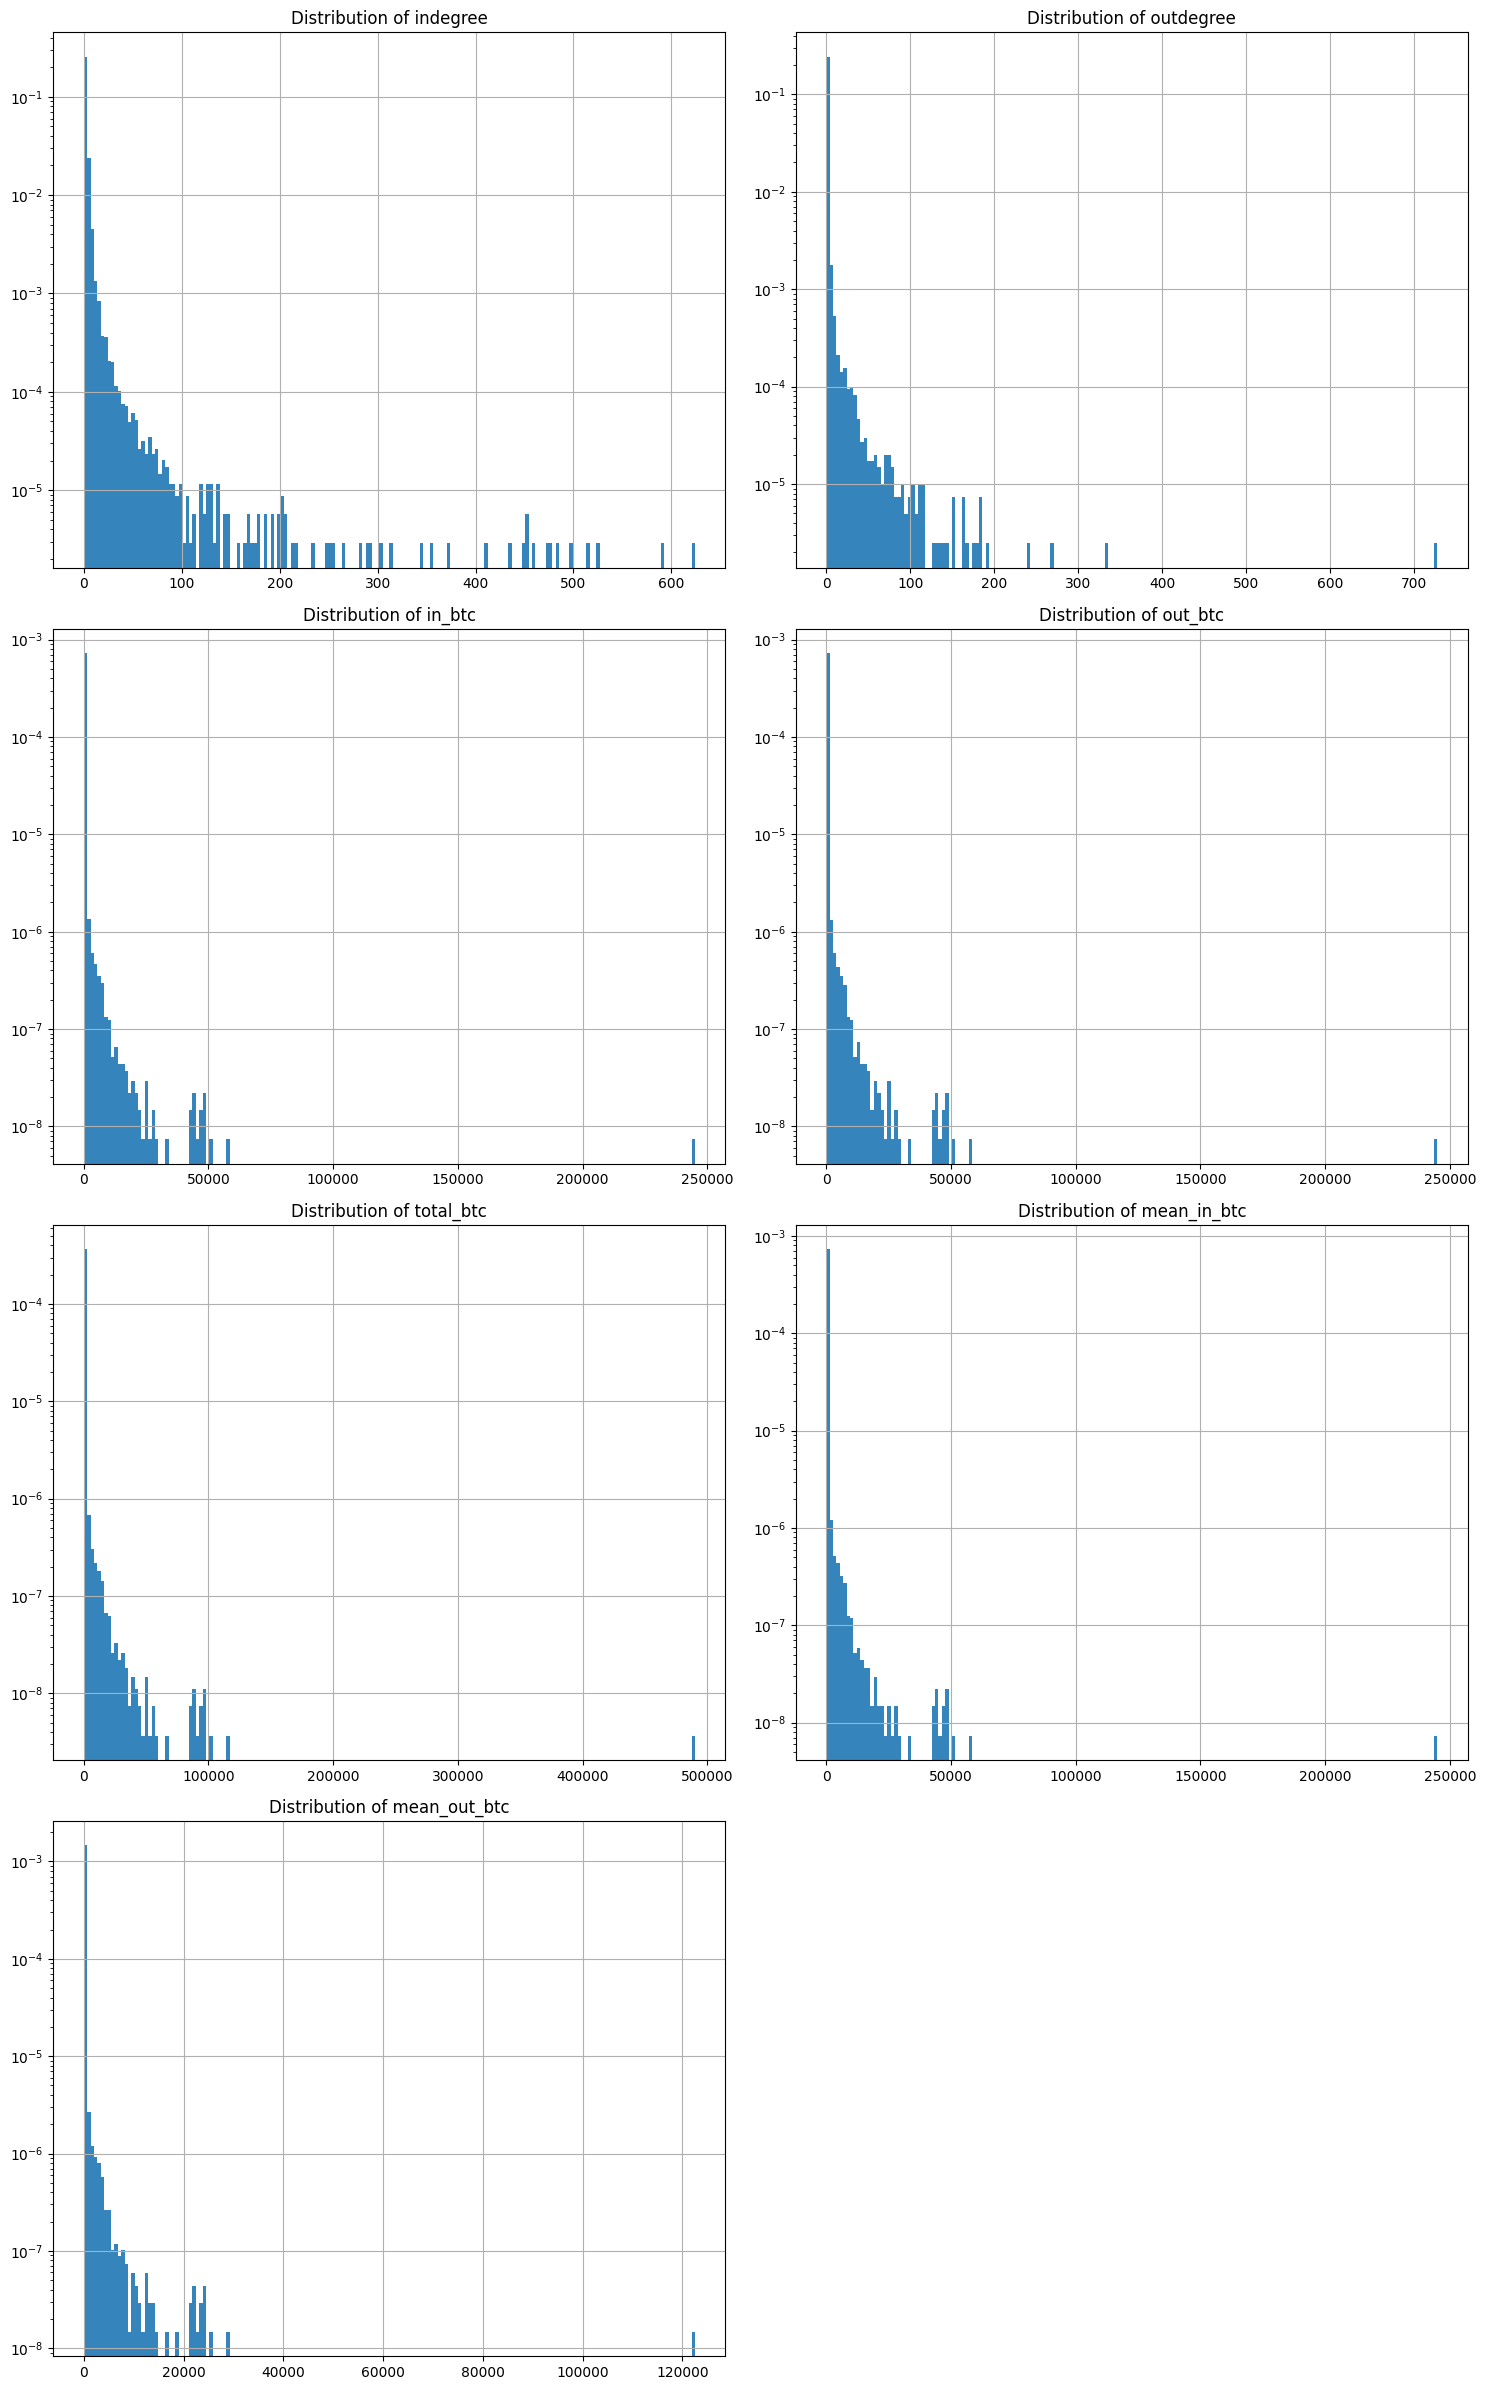

After log transformation:


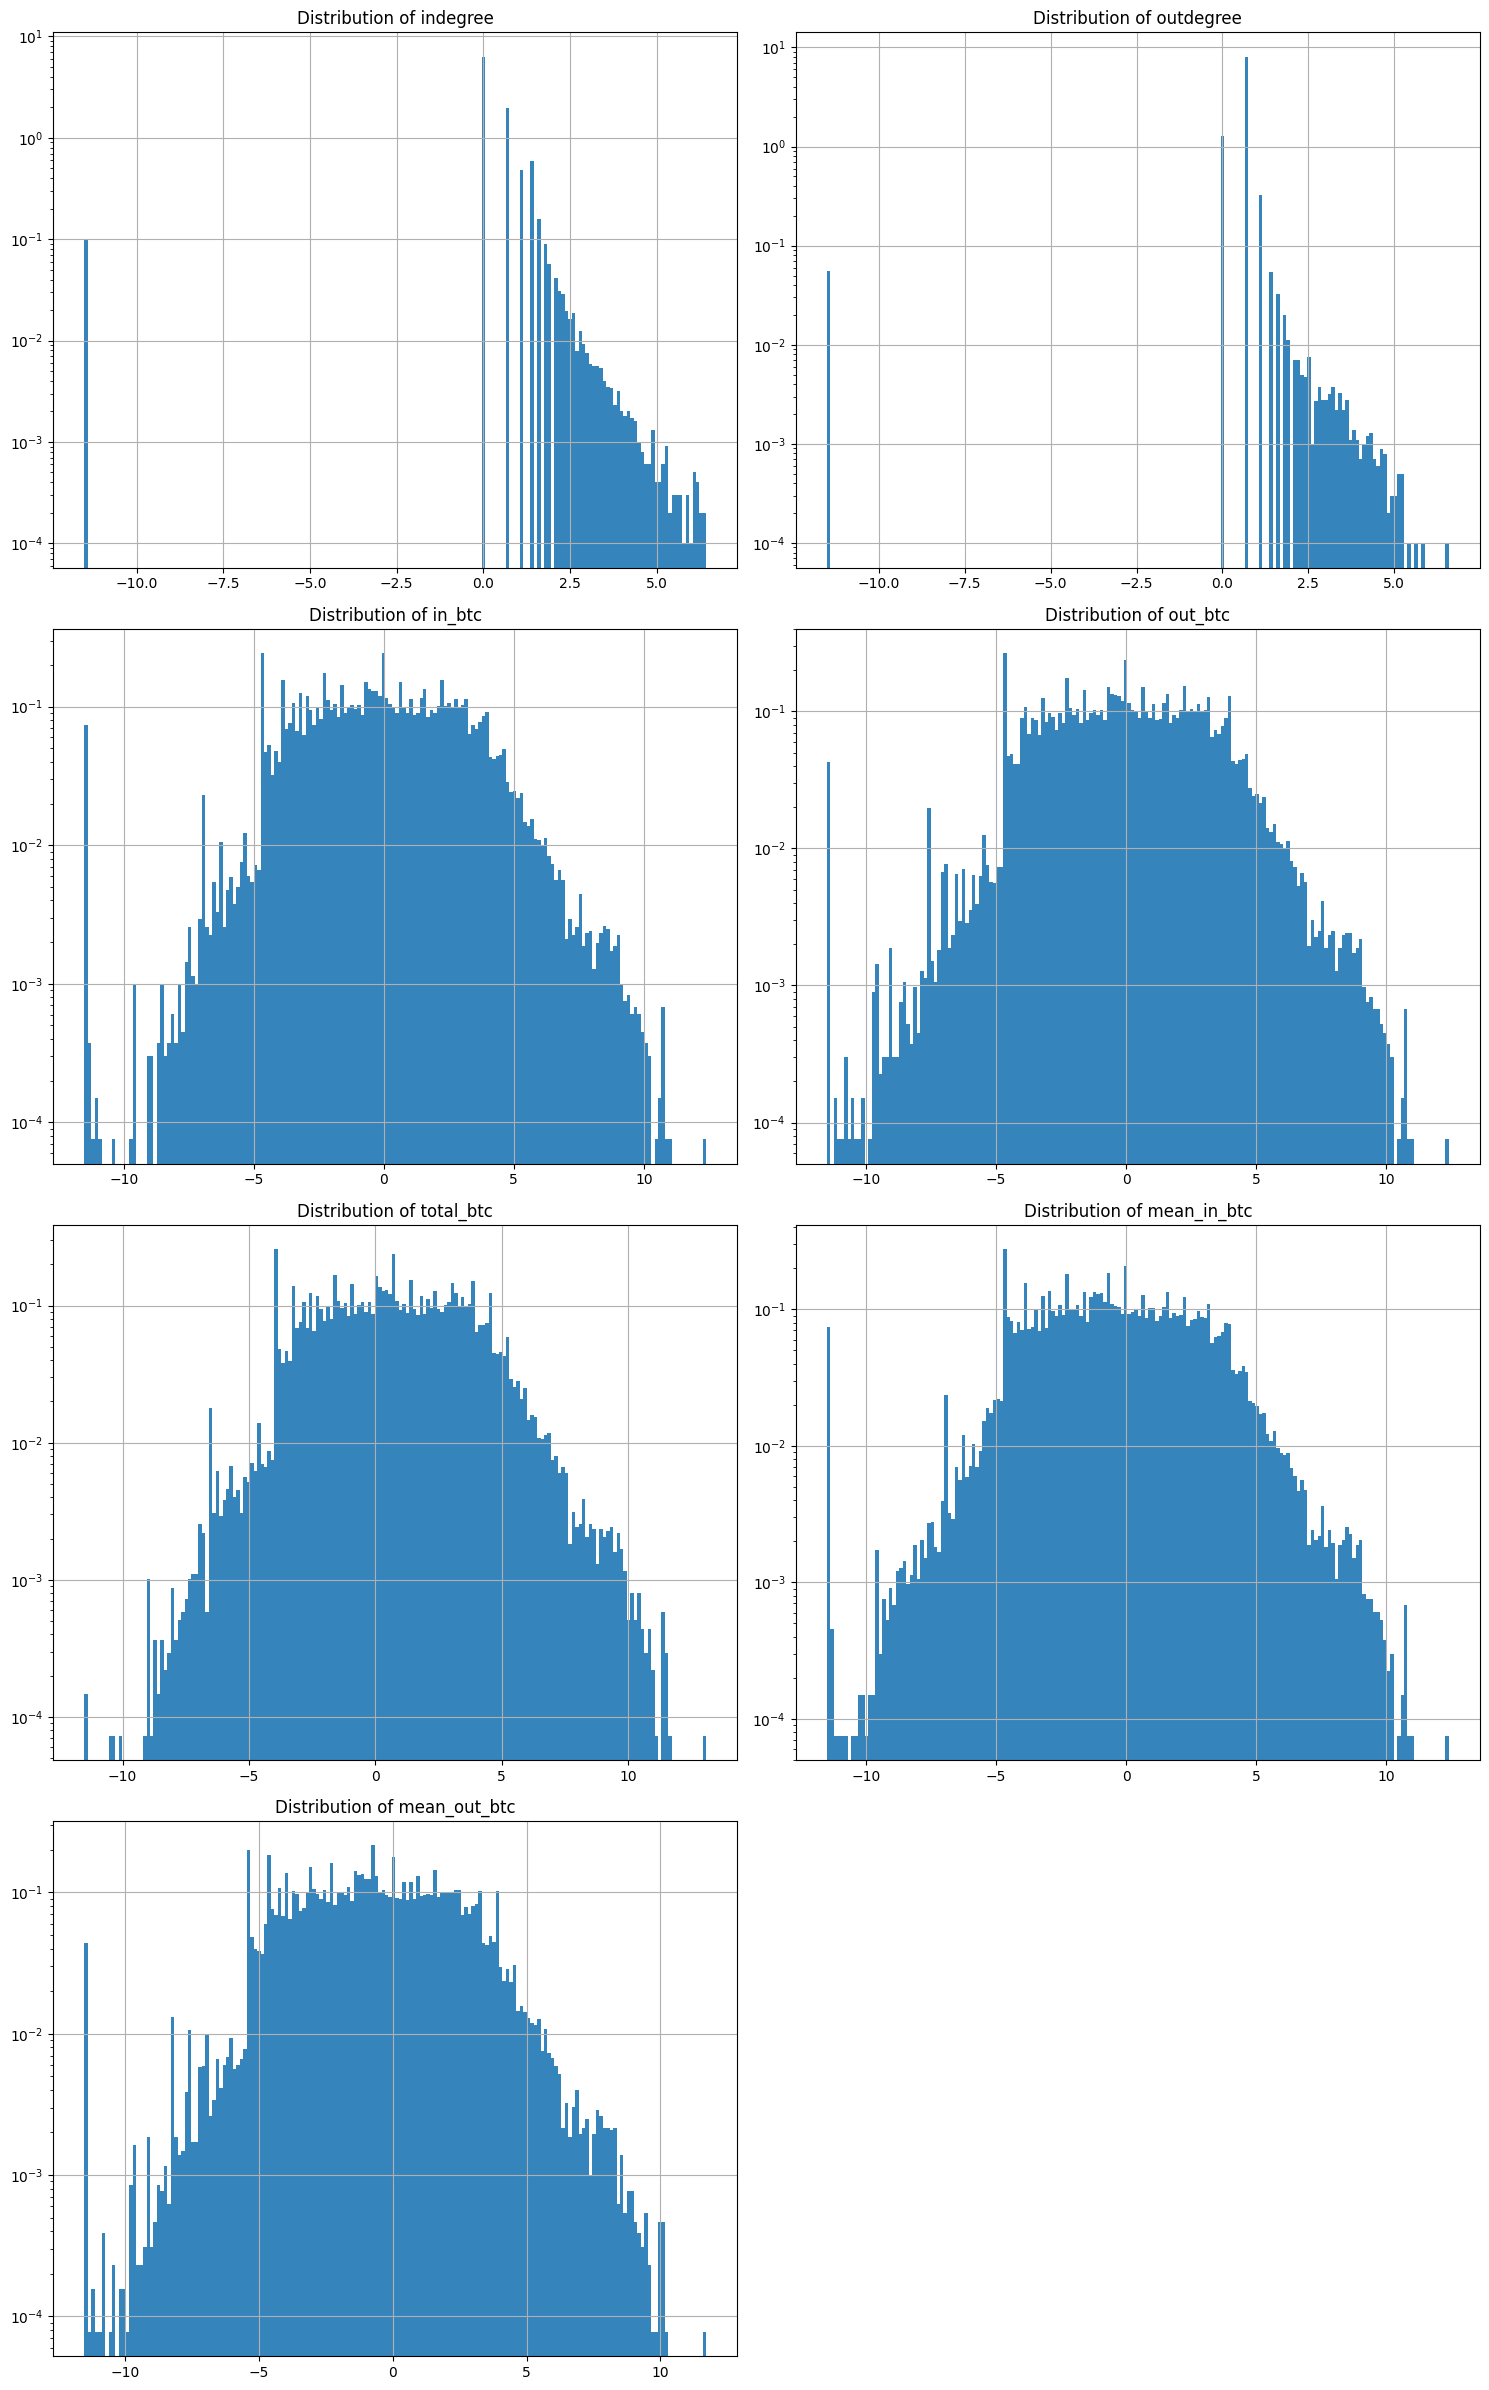

In [34]:
import numpy as np

log_transformed_df = dataset_df.copy()

numeric_columns = [
    'indegree', 'outdegree', 'in_btc', 'out_btc', 
    'total_btc', 'mean_in_btc', 'mean_out_btc'
]

# Small number to avoid log(0) or negative values
epsilon = 1e-5  
for col in numeric_columns:
    log_transformed_df[col] = np.log(dataset_df[col] + epsilon)

# compare the histogram before and after transformation
print('Before log transformation:')
histogram_plot(dataset_df, numeric_columns)

print('After log transformation:')
histogram_plot(log_transformed_df, numeric_columns)

compare before and after robust scale

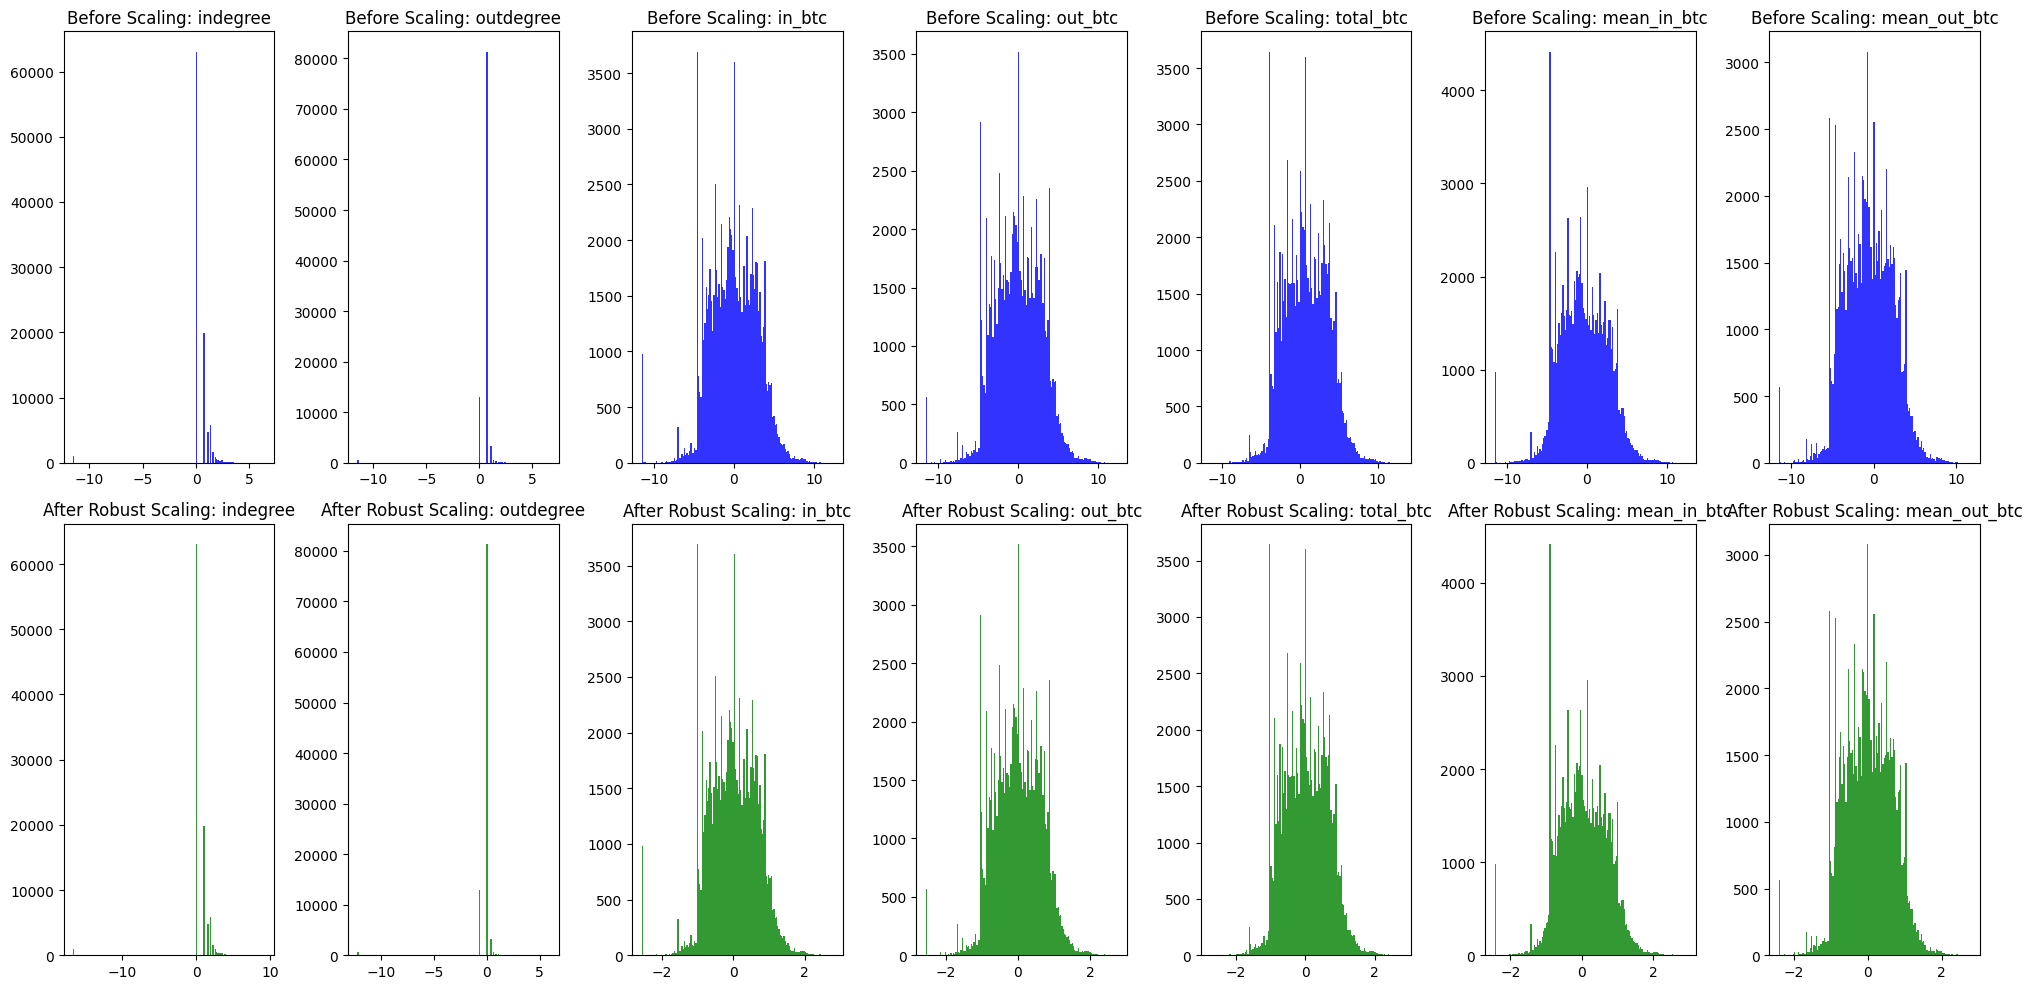

In [36]:
fig, axes = plt.subplots(2, len(numeric_columns), figsize=(20, 10))

for i, col in enumerate(numeric_columns):
    # Before normalization
    axes[0, i].hist(log_transformed_df[col], bins=150, color='blue', alpha=0.8)
    axes[0, i].set_title(f"Before Scaling: {col}")

    # After normalization
    axes[1, i].hist(robust_scaled_data[col], bins=150, color='green', alpha=0.8)
    axes[1, i].set_title(f"After Robust Scaling: {col}")

plt.tight_layout()
plt.show()